# Lista 04 - Teste de Hipótese

In [8]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Fixa a semente geradora de numeros aleatorios para gerar os mesmos resultados a cada execucao
np.random.seed(42)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [4]:
def q1a():
    # YOUR CODE HERE
    return [True, False, True]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance (TVD):

$$ \mathit{TVD}(p, q) = \frac{1}{2}|p - q| = \frac{1}{2}\sum_{i=1}^n |p_i - q_i| $$    
onde $p$ e $q$ são os vetores de proporções

In [5]:
def tvd(p, q):
    # YOUR CODE HERE
    return np.sum(np.abs(p-q)) / 2

In [6]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [7]:
def q1c():
    # YOUR CODE HERE
    # posicao 0 - exatas
    # posicao 1 - humanas
    # posicao 2 - biologicas
    populacao = np.array([2000/12500, 8000/12500, 2500/12500])
    amostra = np.array([100/1000, 600/1000, 300/1000])
    return tvd(populacao, amostra)

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

Por exemplo, o vetor [0, 0, 1, 1, 1, 2] representa uma população de tamanho 6, com dois elementos na classe 0, três elementos na classe 1 e um elemento na classe 2. As proporções são 2/6, 3/6 e 1/6, respectivamente.

In [8]:
def calcula_proporcao(amostra, valor):
    return sum(1 for x in amostra if x == valor) / len(amostra)

def gera_amostra(tamanho_amostra):
    # YOUR CODE HERE
    # posicao 0 - exatas
    # posicao 1 - humanas
    # posicao 2 - biologicas
    proporcao = np.zeros(3)
    amostra = np.random.choice([0, 1, 2], tamanho_amostra, p=[2000/12500, 8000/12500, 2500/12500])
    for i in range(3):
        proporcao[i] = calcula_proporcao(amostra, i)
    return proporcao

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

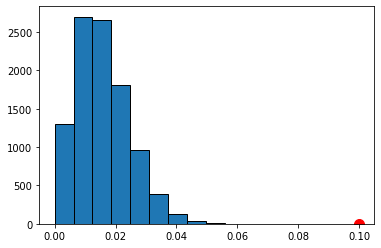

In [9]:
# YOUR CODE HERE
populacao = np.array([2000/12500, 8000/12500, 2500/12500])
tvd_values = np.zeros(10000)
for i in range(10000):
    amostra = gera_amostra(1000)
    tvd_values[i] = tvd(populacao, amostra)

tvd_entrevista = q1c()
plt.hist(tvd_values, edgecolor = 'k')
plt.plot([tvd_entrevista], [0], 'ro', ms=10)
plt.show()

F) Escreva uma função q1f(x) que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de x% de confiança.

__Dica__: Utilize o método baseado em boostrap, ou seja, calcule o TVD para um número grande de amostras da população, como foi feito no passo anterior. Em seguida, encontre o percentil dos TVDs calculados que corresponde ao nível de confiança de 90%.

Retorne apenas o lado direito do intervalo de confiança para o TVD.


In [10]:
def q1f(x):
    # YOUR CODE HERE
    populacao = np.array([2000/12500, 8000/12500, 2500/12500])
    num = (100 - x)/2
    direito = 100 - num
    esquerdo = num
    tvd_values = np.zeros(10000)
    for i in range(10000):
        amostra = gera_amostra(1000)
        tvd_values[i] = tvd(populacao, amostra)
    return np.percentile(tvd_values, direito)

In [11]:
from numpy.testing import *
assert_almost_equal( q1f(95), 0.034, 3 )
assert_almost_equal( q1f(90), 0.031, 3 )
assert_almost_equal( q1f(80), 0.026, 3 )

# Exercício 02:

Usando os dados do arquivo ```enem2015.csv```, vamos realizar um teste por permutação.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('enem2015.csv')
df.head()

,DEPENDENCIA_ADMINISTRATIVA,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
0,Federal,659.258362,92.2,96.894409
1,Federal,637.646728,86.5,98.717949
2,Estadual,556.710632,82.5,74.603180
3,Estadual,542.865967,70.2,54.651165
4,Estadual,557.379150,67.0,64.864861


A) Implemente uma função que retorne a diferença entre a média das notas das escolas públicas federais e a média das notas de  escolas privadas. Exemplo:

```python
def q2a(df):
    media_federal = 631.0
    media_particular = 620.0
    return 11.0
```

In [5]:
def q2a(df):
    # YOUR CODE HERE
    privadas = df[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Privada']['NOTA_MEDIA_ESCOLA']
    federais = df[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Federal']['NOTA_MEDIA_ESCOLA']
    media_privada = privadas.mean()
    media_federal = federais.mean()
    return media_federal - media_privada
q2a(df)

9.21003744957261

B) Realize permutações com os rótulos (Federal / Privada), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias notas, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

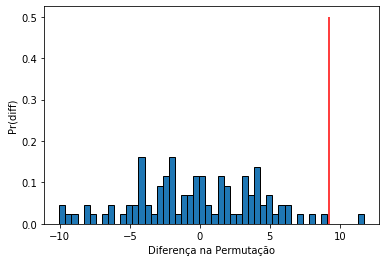

In [6]:
from IPython.display import Image
Image('100permutacoes.png')

Valor observado:  9.21003744957261
Percentile de 97.5% dos casos (5% de erro): 3.353972054499745


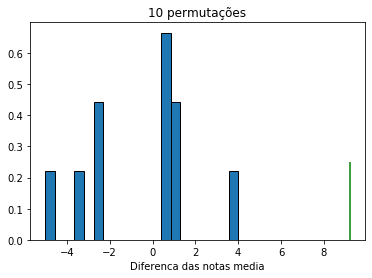

Valor observado:  9.21003744957261
Percentile de 97.5% dos casos (5% de erro): 9.28744760328317


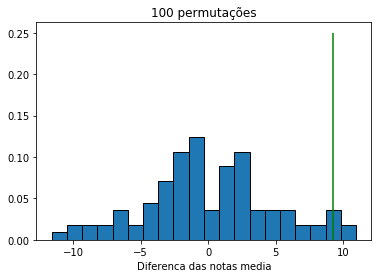

Valor observado:  9.21003744957261
Percentile de 97.5% dos casos (5% de erro): 8.697397198476448


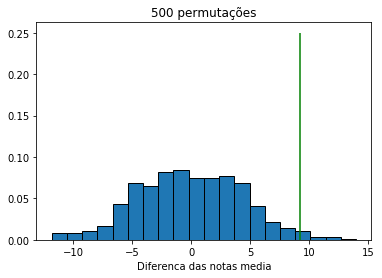

Valor observado:  9.21003744957261
Percentile de 97.5% dos casos (5% de erro): 9.053654074139242


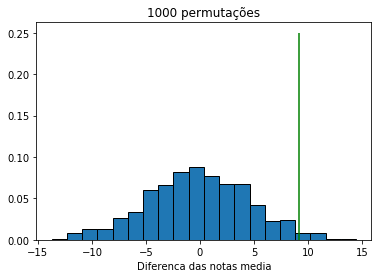

Valor observado:  9.21003744957261
Percentile de 97.5% dos casos (5% de erro): 9.248656916705857


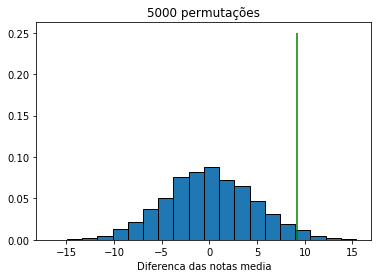

In [10]:
# YOUR CODE HERE
df = df[df['DEPENDENCIA_ADMINISTRATIVA'].isin(['Federal', 'Privada'])]
filtro = df['DEPENDENCIA_ADMINISTRATIVA'] == 'Federal'
observada = q2a(df)
np.random.shuffle(filtro.values)

N = [10, 100, 500, 1000, 5000]
for n in N:
    diferenca_array = np.zeros(n)
    for i in range(n):
        np.random.shuffle(filtro.values)
        dif = df[filtro]['NOTA_MEDIA_ESCOLA'].mean() - df[~filtro]['NOTA_MEDIA_ESCOLA'].mean()
        diferenca_array[i] = dif
    plt.hist(diferenca_array, bins = 20, density = True, edgecolor = 'k')
    plt.title(f'{n} permutações')
    plt.xlabel('Diferenca das notas media')
    #plt.plot(observada, 0, 'ro', ms=10)
    plt.vlines(observada, 0, 0.25, color='green')
    print('Valor observado: ', observada)
    print('Percentile de 97.5% dos casos (5% de erro):', np.percentile(diferenca_array, 97.5))
    plt.show()

B) Escreva abaixo o que você observou com os gráficos.

Analisando o percentile de 97.5% (5% de erro), temos um valor bem próximo do valor observado, ou seja, o valor observado ocorre em 2.5% ou menos das vezes, o que o torna uma ocorrência bem rara, podendo então rejeitar a hipótese nula de que as notas das instituições federais e privadas são iguais.